# Homework 1

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
from itertools import combinations
import collections

# Lets work on network 2. 

First, we import the data.

In [3]:
G1 = nx.read_edgelist('./Networks/ca-GrQc.txt', comments='#',
                     create_using=nx.Graph(), 
                     delimiter='\t', 
                     nodetype=int, 
                     encoding='utf-8')

# Network 1 .Problem 1.

Problem 1 is about basic analysis of the network. 

Our graph is undirected (info we got from the details of the file) so in/out-degree and number of sink/source nodes can't exist.

In [4]:
N = len(G1)
L = G1.size()
sL= G1.number_of_selfloops()
degrees = [G1.degree(node) for node in G1]
kmin = min(degrees)
kmax = max(degrees)
clCo=nx.average_clustering(G1)
gClCo=nx.transitivity(G1)

Let's check if the graph is connected of not

In [5]:
print("Check if graph is connected")
print(nx.is_connected(G1))

Check if graph is connected
False


Because our graph is not connected, we will use as our diameter, the diameter of the largest connected component

In [6]:

subGraphsDiam=[]
if nx.is_connected(G1)==False:
    comp=nx.connected_component_subgraphs(G1)
    for i in comp:
        subGraphsDiam.append(nx.diameter(i))
    diam=max(subGraphsDiam)
else:
    diam=nx.diameter(G1)


In the cell bellow, we calculate the maximum connected component for the weakest and strongest connected compontent, as seen bellow. Because we have a undirected graph, we dont have a strong and weak connected components, as per definition.

In [7]:
strong = G1.subgraph(max(nx.connected_components(G1), key=len))
weak = G1.subgraph(max(nx.connected_components(G1), key=len))

In [8]:
def have_bidirectional_relationship(G, node1, node2):
    return G.has_edge(node1, node2) and G.has_edge(node2, node1)

In [9]:
biconnections = set()
for u, v in G1.edges():
    if u > v:  # Avoid duplicates, such as (1, 2) and (2, 1)
        v, u = u, v
    if have_bidirectional_relationship(G1, u, v):
        biconnections.add((u, v))


In [10]:
print("===============================================\n")
print("Our results\n")
print("===============================================\n")
print("Number of nodes: ", N)
print("Number of edges: ", L)
print()
print("Number of self loops", sL)
print()
print("Number of reciprocated edges",len(biconnections))
print("Average degree:", np.mean(degrees))
print("Minimum degree: ", kmin)
print("Maximum degree: ", kmax)
print()
print("Diameter", diam)
print()
print("Average clustering coefficient:",clCo)
print()
print("Global clustering coefficient:",gClCo)
print()
print("Nodes of Largest Strongly Connected Component",len(strong))
print("Edges of Largest Strongly Connected Component",len(strong.edges()))
print()
print("Nodes of Largest Weakly Connected Component",len(weak))
print("Edges of Largest Weakly Connected Component",len(weak.edges()))
print()


Our results


Number of nodes:  5242
Number of edges:  14496

Number of self loops 12

Number of reciprocated edges 14496
Average degree: 5.530713468141931
Minimum degree:  1
Maximum degree:  81

Diameter 17

Average clustering coefficient: 0.529635811052136

Global clustering coefficient: 0.6298424741263426

Nodes of Largest Strongly Connected Component 4158
Edges of Largest Strongly Connected Component 13428

Nodes of Largest Weakly Connected Component 4158
Edges of Largest Weakly Connected Component 13428



# Counting the Clustering coefficient of Largest connected component

In [24]:
clCo=nx.average_clustering(G1.subgraph(max(nx.connected_components(G1), key=len)))
gClCo=nx.transitivity(G1.subgraph(max(nx.connected_components(G1), key=len)))
print(clCo)
print(gClCo)

0.5568782161697915
0.6288944756689877


# Plotting time..
Now we plot the distribution of nodes. In linear and logarithmic scales.

# Linear Scale

In [11]:
bin_edges = np.linspace(kmin, kmax, num=len(degrees))
density, bins = np.histogram(degrees, bins=bin_edges, density=True)

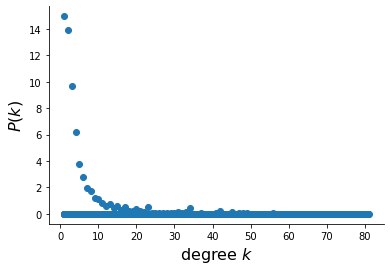

In [12]:
fig = plt.figure(figsize=(6,4))

log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()

# LogLog without log binning

In [13]:
bin_edges = np.linspace(kmin, kmax, num=len(degrees))
density, bins = np.histogram(degrees, bins=bin_edges, density=True)

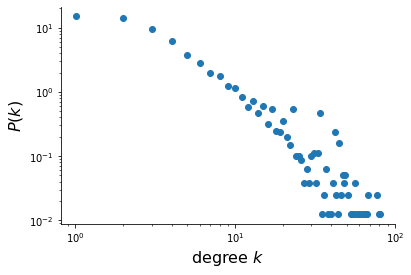

In [14]:
fig = plt.figure(figsize=(6,4))

log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()

# LogLog with log binning

In [15]:
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=len(degrees))
density, bins = np.histogram(degrees, bins=bin_edges, density=True)

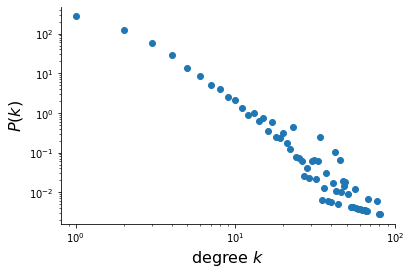

In [16]:
fig = plt.figure(figsize=(6,4))

log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)


ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()

# Cumulative edge distribution, logarithmic scale

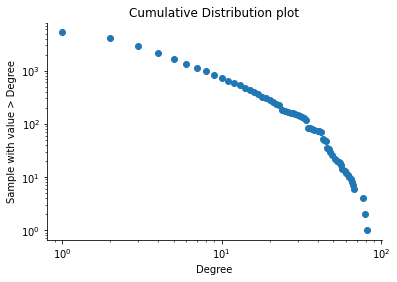

In [17]:
degree_sequence = sorted(degrees, reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
cs = np.cumsum(cnt)
plt.loglog(deg, cs, marker='o', linestyle='none')
plt.title("Cumulative Distribution plot")
plt.ylabel("Sample with value > Degree")
plt.xlabel("Degree")

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.show()

# Cumulative log binning

(81, 79, 77, 68, 67, 66, 65, 63, 62, 60, 59, 57, 56, 55, 54, 53, 51, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1)


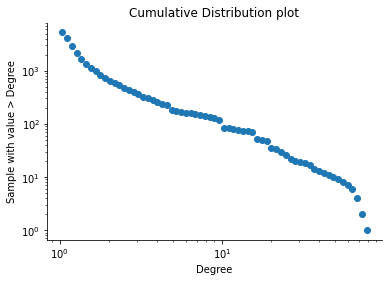

In [18]:
degree_sequence = sorted(degrees, reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
cs = np.cumsum(cnt)

print(deg)

bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=len(deg)+1)
density, bins = np.histogram(degrees, bins=bin_edges, density=True)
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)



plt.loglog(sorted(x,reverse=True), cs, marker='o', linestyle='none')
plt.title("Cumulative Distribution plot")
plt.ylabel("Sample with value > Degree")
plt.xlabel("Degree")

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.show()

# Zipf Distribution

(1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 4, 3, 4, 2, 13, 1, 2, 19, 3, 1, 1, 5, 2, 1, 37, 9, 3, 9, 8, 3, 5, 3, 7, 8, 8, 44, 12, 16, 28, 19, 20, 43, 25, 48, 38, 58, 46, 66, 92, 98, 141, 159, 225, 299, 497, 775, 1114, 1196) [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]


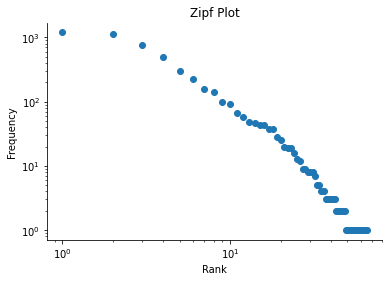

In [19]:

degree_sequence = sorted(degrees, reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
plt.loglog([i+1 for i in range(len(deg))],sorted(cnt, reverse=True), marker='o', linestyle='none')
plt.title("Zipf Plot")
plt.ylabel("Frequency")
plt.xlabel("Rank")


ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()



# Log Binning

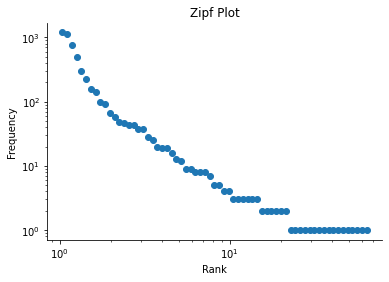

In [23]:

degree_sequence = sorted(degrees, reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())


bin_edges = np.logspace(np.log10(1), np.log10(len(deg)+1), num=len(deg)+1)
density, bins = np.histogram([i for i in range(len(cnt))], bins=bin_edges, density=True)
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x,sorted(cnt, reverse=True), marker='o', linestyle='none')
plt.title("Zipf Plot")
plt.ylabel("Frequency")
plt.xlabel("Rank")


ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()
